In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as snb

In [4]:
# Loading the data
sales_data = pd.read_csv('Walmart_Store_sales.csv')

In [5]:
# Inspecting the data
print(f"Sales Head:\n{sales_data.head()}")
print(f"Sales Tail:\n{sales_data.tail()}")
print()

Sales Head:
   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  
Sales Tail:
      Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  

In [6]:
# Printing a summary of the data
print(f"Sales data summary:\n{sales_data.info}")
print()

Sales data summary:
<bound method DataFrame.info of       Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85    

In [7]:
# Checking for missing values
print(f"Count of missing values:\n{sales_data.isna().sum()}")
print(f"Count of null values:\n{sales_data.isnull().sum()}")
print()

Count of missing values:
Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64
Count of null values:
Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64



## Initial Assessment
* There are no missing or null values on the DataFrme
* The DataFrame has 6435 rows x 8 columns

In [8]:
# Converting the columns to their own data format
sales_data['Date'] = pd.to_datetime(sales_data['Date'], dayfirst=True)
print(f"Date type column is now {sales_data['Date'].dtype}")

sales_data['Holiday_Flag'] = sales_data['Holiday_Flag'].astype(bool)
print(f"Holiday_Flag type column is now {sales_data['Holiday_Flag'].dtype}")
print()

Date type column is now datetime64[ns]
Holiday_Flag type column is now bool



In [9]:
# Basic Statistics
# Which store has the maximum sales
sales_by_store = sales_data.groupby('Store')['Weekly_Sales'].sum()
top_store_sales = sales_by_store.idxmax()
top_store_sales_amount = sales_by_store.max()
print(f"Store with highest sales: Store_{top_store_sales} with ${top_store_sales_amount:,.2f}")

Store with highest sales: Store_20 with $301,397,792.46


In [10]:
# Which store has the maximun standard deviation
top_store_std = sales_data.groupby('Store')['Weekly_Sales'].std().idxmax()
print(f"The store with maximum standard deviation is Store_{top_store_std}")

The store with maximum standard deviation is Store_14


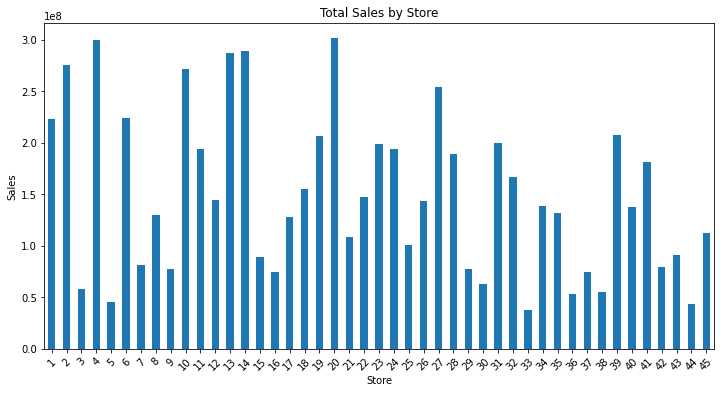

Sales by Store:
Store
1     $222,402,808.85
2     $275,382,440.98
3      $57,586,735.07
4     $299,543,953.38
5      $45,475,688.90
6     $223,756,130.64
7      $81,598,275.14
8     $129,951,181.13
9      $77,789,218.99
10    $271,617,713.89
11    $193,962,786.80
12    $144,287,230.15
13    $286,517,703.80
14    $288,999,911.34
15     $89,133,683.92
16     $74,252,425.40
17    $127,782,138.83
18    $155,114,734.21
19    $206,634,862.10
20    $301,397,792.46
21    $108,117,878.92
22    $147,075,648.57
23    $198,750,617.85
24    $194,016,021.28
25    $101,061,179.17
26    $143,416,393.79
27    $253,855,916.88
28    $189,263,680.58
29     $77,141,554.31
30     $62,716,885.12
31    $199,613,905.50
32    $166,819,246.16
33     $37,160,221.96
34    $138,249,763.00
35    $131,520,672.08
36     $53,412,214.97
37     $74,202,740.32
38     $55,159,626.42
39    $207,445,542.47
40    $137,870,309.79
41    $181,341,934.89
42     $79,565,752.43
43     $90,565,435.41
44     $43,293,087.84
45    $112

In [13]:
# Sales by Store Bar Chart
plt.figure(figsize=(12, 6)) # 12in wide, 6in tall
sales_by_store.plot(kind='bar')
plt.title('Total Sales by Store')
plt.xlabel('Store')
plt.ylabel('Sales')
plt.xticks(rotation=45) # Rotating the x-axis labels by 45 degrees
plt.show()

print(f"Sales by Store:")
print(sales_by_store.apply(lambda x: f"${x:,.2f}"))

In [14]:
# Median, Mean, Standard Deviation, Distribution
mean_sales = sales_by_store.mean()
median_sales = sales_by_store.median()
std_sales = sales_by_store.std()

print(f"The mean sales is {mean_sales:,.2f}")
print(f"The median sales is {median_sales:,.2f}")
print(f"The standard deviation of sales is {std_sales:,.2f}")
print()

The mean sales is 149,715,977.49
The median sales is 138,249,763.00
The standard deviation of sales is 78,167,556.49



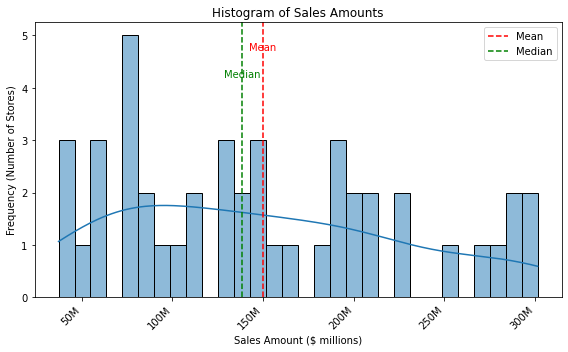

In [15]:
# Plot a histogram of sales amounts
plt.figure(figsize=(8, 5)) # in width, in height
snb.histplot(sales_by_store / 1e6, bins=30, kde=True)  # Convert to millions for readability
plt.title("Histogram of Sales Amounts")
plt.xlabel("Sales Amount ($ millions)")
plt.ylabel("Frequency (Number of Stores)")

# Add mean and median lines
plt.axvline(mean_sales / 1e6, color='red', linestyle='--', label='Mean')
plt.axvline(median_sales / 1e6, color='green', linestyle='--', label='Median')

# Add text annotations
plt.text(mean_sales / 1e6, plt.ylim()[1]*0.9, 'Mean', color='red', ha='center')
plt.text(median_sales / 1e6, plt.ylim()[1]*0.8, 'Median', color='green', ha='center')

# Set x-ticks in millions
xticks = np.arange(50, 301, 50)
plt.xticks(xticks, [f'{x}M' for x in xticks], rotation=45, ha='right')

plt.legend()
plt.tight_layout()
plt.show()

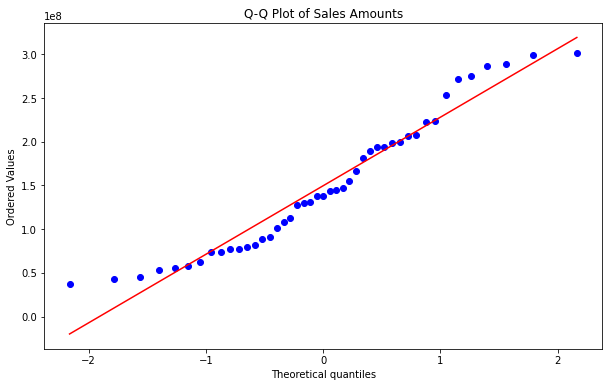

In [16]:
# Plot a Q-Q plot to check for normality
plt.figure(figsize=(10, 6))
stats.probplot(sales_by_store, dist='norm', plot=plt)
plt.title("Q-Q Plot of Sales Amounts")
plt.show()

## Analysis = Sales by Store
* The sales amount varies from 37M (Store_33) to 301M (Store_20), indicating aa wide variation across stores
* The mean sales is 149M, while the median is 138M. This suggests that the distribution of sales amounts is slightly skewed to the right, with a few extremely high sales amounts pulling the mean upwards.
* The standard deviation of sales is 78M million, indicating a high degree of variability in sales amounts across different stores.


In [18]:
# Which stores had a quarterly growth rate in Q3, 2012
sales_data_q2 = sales_data[(sales_data['Date'] >= '2012-04-01') & (sales_data['Date'] <= '2012-06-30')]
sales_data_q3 = sales_data[(sales_data['Date'] >= '2012-07-01') & (sales_data['Date'] <= '2012-09-30')]

# Aggregate total sales per store for each quarter
q2_sales = sales_data_q2.groupby('Store')['Weekly_Sales'].sum()
q3_sales = sales_data_q3.groupby('Store')['Weekly_Sales'].sum()

# Combine into a DataFrame
quarterly_growth = pd.DataFrame({
    'Q2_2012_Sales': q2_sales,
    'Q3_2012_Sales': q3_sales
})

# Calculate growth rate
quarterly_growth['Growth_Rate (%)'] = ((quarterly_growth['Q3_2012_Sales'] - quarterly_growth['Q2_2012_Sales']) / quarterly_growth['Q2_2012_Sales']) * 100

# Identify stores with positive growth
positive_growth_stores = quarterly_growth[quarterly_growth['Growth_Rate (%)'] > 0].sort_values(by='Growth_Rate (%)', ascending=False)

# Display the stores with good quarterly growth rate in Q3 2012
print("Stores with good quarterly growth rate in Q3 2012:")
print(positive_growth_stores)
print()

Stores with good quarterly growth rate in Q3 2012:
       Q2_2012_Sales  Q3_2012_Sales  Growth_Rate (%)
Store                                               
7         7290859.27     8262787.39        13.330776
16        6564335.98     7121541.64         8.488378
35       10838313.00    11322421.12         4.466637
26       13155335.57    13675691.91         3.955478
39       20214128.46    20715116.23         2.478404
41       17659942.73    18093844.01         2.456980
44        4306405.78     4411251.16         2.434638
24       17684218.91    17976377.72         1.652088
40       12727737.53    12873195.37         1.142841
23       18488882.82    18641489.15         0.825395



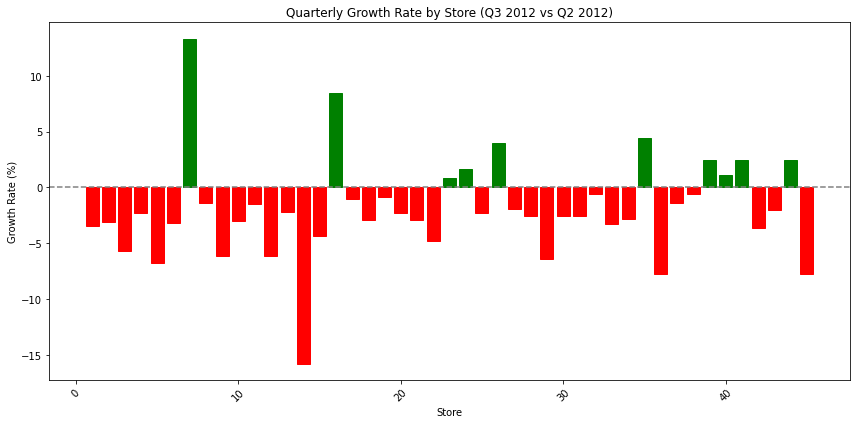

In [19]:
# Plotting the growth rate graph
quarterly_growth_sorted = quarterly_growth.sort_values(by='Growth_Rate (%)', ascending=False)
plt.figure(figsize=(12, 6))
bars = plt.bar(quarterly_growth_sorted.index, quarterly_growth_sorted['Growth_Rate (%)'], color='skyblue')
plt.axhline(0, color='gray', linestyle='--')

# Highlight positive and negative growth
for bar, growth in zip(bars, quarterly_growth_sorted['Growth_Rate (%)']):
    if growth > 0:
        bar.set_color('green')
    else:
        bar.set_color('red')

plt.title('Quarterly Growth Rate by Store (Q3 2012 vs Q2 2012)')
plt.xlabel('Store')
plt.ylabel('Growth Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Analysis = Sales by Store
* Only 10 out of the 45 stores had a positive growth in Q3 2012, compared with Q2.
* Store_7 had the highest growth over all others, growing 13% in Q3 compared with Q2


In [20]:
# Holidays
holiday_labels = {
    '2010-02-12': 'Super Bowl 2010',
    '2011-02-11': 'Super Bowl 2011',
    '2012-02-10': 'Super Bowl 2012',
    '2013-02-08': 'Super Bowl 2013',
    '2010-09-10': 'Labour Day 2010',
    '2011-09-09': 'Labour Day 2011',
    '2012-09-07': 'Labour Day 2012',
    '2013-09-06': 'Labour Day 2013',
    '2010-11-26': 'Thanksgiving 2010',
    '2011-11-25': 'Thanksgiving 2011',
    '2012-11-23': 'Thanksgiving 2012',
    '2013-11-29': 'Thanksgiving 2013',
    '2010-12-31': 'Christmas 2010',
    '2011-12-30': 'Christmas 2011',
    '2012-12-28': 'Christmas 2012',
    '2013-12-27': 'Christmas 2013'
}

In [22]:
# Holiday Impact
non_holiday_sales_mean = sales_data[sales_data['Holiday_Flag'] == False]['Weekly_Sales'].mean()

holiday_weeks = sales_data[sales_data['Holiday_Flag'] == True]
holiday_sales_mean = holiday_weeks.groupby('Date')['Weekly_Sales'].mean()

# Identify holidays with higher average sales than the mean non-holiday sales
high_sales_holidays = holiday_sales_mean[holiday_sales_mean > non_holiday_sales_mean]

# Transforming holiday names into x_axis labels
holiday_labels_dt = {pd.to_datetime(k): v for k, v in holiday_labels.items()}
x_labels = [holiday_labels_dt.get(date, date.strftime('%Y-%m-%d')) for date in high_sales_holidays.index]

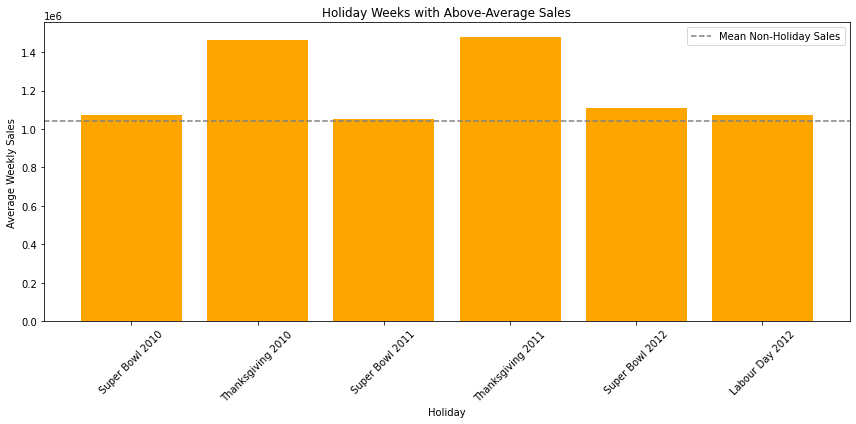

In [23]:
# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.bar(x_labels, high_sales_holidays.values, color='orange')
plt.axhline(non_holiday_sales_mean, color='gray', linestyle='--', label='Mean Non-Holiday Sales')
plt.title('Holiday Weeks with Above-Average Sales')
plt.xlabel('Holiday')
plt.ylabel('Average Weekly Sales')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

## Analysis = Holiday Impact
* All listed holidays show higher average weekly sales than the non-holiday mean
* Thanksgiving stands out with the highest spikes.


In [24]:
# Monthly sales summary
monthly_sales = sales_data.groupby(sales_data['Date'].dt.to_period('M'))['Weekly_Sales'].sum().reset_index()
monthly_sales['Date'] = monthly_sales['Date'].astype(str)
monthly_sales.rename(columns={'Weekly_Sales': 'Monthly_Sales'}, inplace=True)

# Semester sales summary
sales_data['Semester'] = sales_data['Date'].dt.month.apply(lambda m: 'H1' if m <= 6 else 'H2')
sales_data['Year_Semester'] = sales_data['Date'].dt.year.astype(str) + '-' + sales_data['Semester']
semester_sales = sales_data.groupby('Year_Semester')['Weekly_Sales'].sum().reset_index()
semester_sales.rename(columns={'Weekly_Sales': 'Semester_Sales'}, inplace=True)

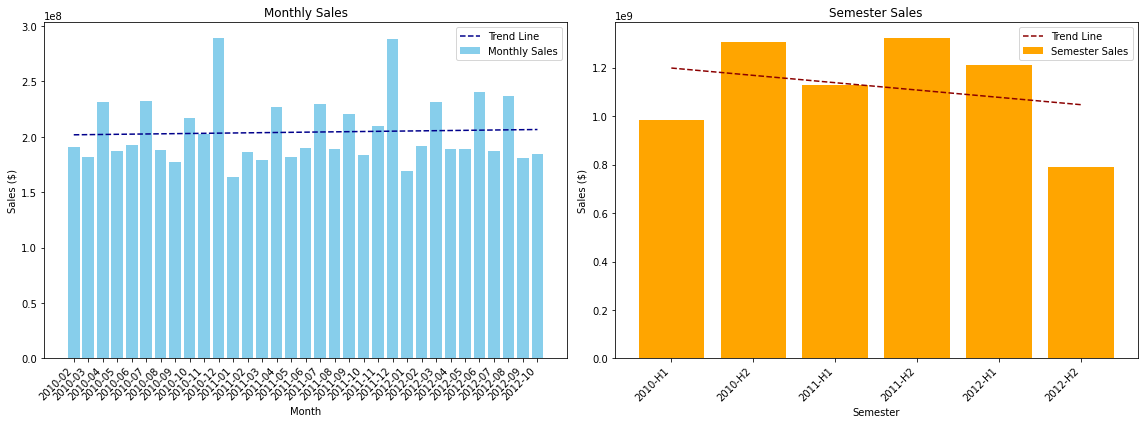

In [25]:
# Create subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Monthly sales bar chart with trend line
x_months = np.arange(len(monthly_sales))
axes[0].bar(x_months, monthly_sales['Monthly_Sales'], color='skyblue', label='Monthly Sales')
z_month = np.polyfit(x_months, monthly_sales['Monthly_Sales'], 1)
p_month = np.poly1d(z_month)
axes[0].plot(x_months, p_month(x_months), color='darkblue', linestyle='--', label='Trend Line')
axes[0].set_title('Monthly Sales')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Sales ($)')
axes[0].set_xticks(x_months)
axes[0].set_xticklabels(monthly_sales['Date'], rotation=45, ha='right')
axes[0].legend()

# Semester sales bar chart with trend line
x_semesters = np.arange(len(semester_sales))
axes[1].bar(x_semesters, semester_sales['Semester_Sales'], color='orange', label='Semester Sales')
z_sem = np.polyfit(x_semesters, semester_sales['Semester_Sales'], 1)
p_sem = np.poly1d(z_sem)
axes[1].plot(x_semesters, p_sem(x_semesters), color='darkred', linestyle='--', label='Trend Line')
axes[1].set_title('Semester Sales')
axes[1].set_xlabel('Semester')
axes[1].set_ylabel('Sales ($)')
axes[1].set_xticks(x_semesters)
axes[1].set_xticklabels(semester_sales['Year_Semester'], rotation=45, ha='right')
axes[1].legend()

plt.tight_layout()
plt.show()

## Analysis = Monthly vs Semesterly Sales
* Monthly sales data shows a slight upward trend
* Semester sales data shows a downward trend
* This contrast suggests a need to investigate seasonal effects, store-level performance, or external influences (e.g., inflation, competition).


In [26]:
# Create Year-Semester column
sales_data['Semester'] = sales_data['Date'].dt.month.apply(lambda m: 'H1' if m <= 6 else 'H2')
sales_data['Year_Semester'] = sales_data['Date'].dt.year.astype(str) + '-' + sales_data['Semester']

# Aggregate semester-level data
semester_summary = sales_data.groupby('Year_Semester').agg({
    'Weekly_Sales': 'sum',
    'Temperature': 'mean',
    'Fuel_Price': 'mean',
    'CPI': 'mean',
    'Unemployment': 'mean'
}).reset_index()

# Rename columns for clarity
semester_summary.rename(columns={
    'Weekly_Sales': 'Semester_Sales',
    'Temperature': 'Avg_Temperature',
    'Fuel_Price': 'Avg_Fuel_Price',
    'CPI': 'Avg_CPI',
    'Unemployment': 'Avg_Unemployment'
}, inplace=True)

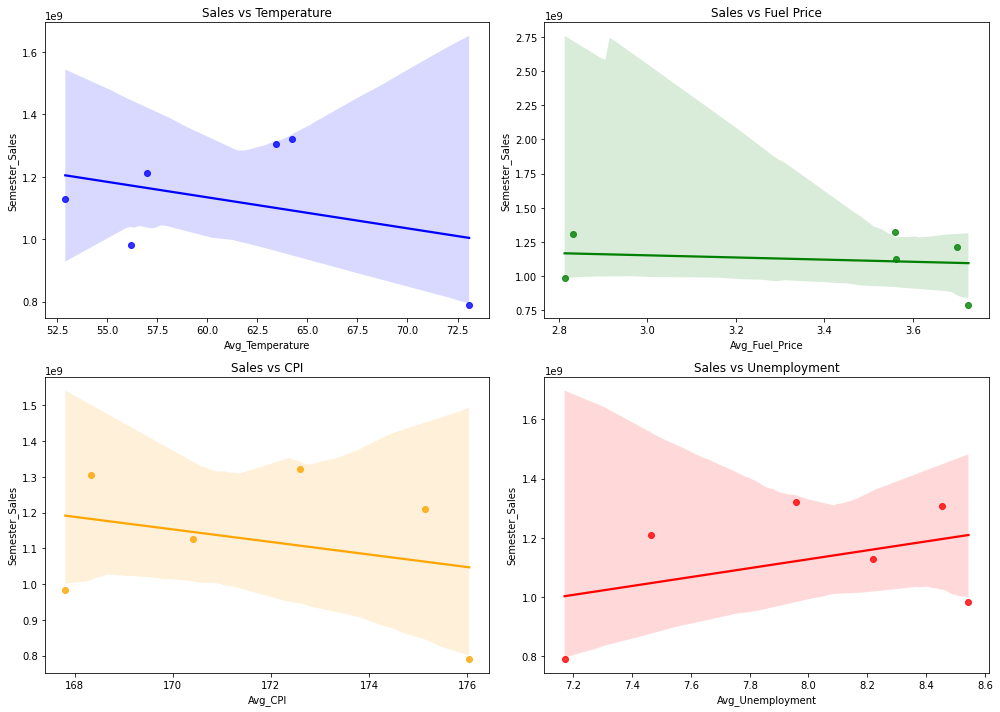

In [27]:
# Plotting relationships scatter plots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

snb.regplot(data=semester_summary, x='Avg_Temperature', y='Semester_Sales', ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Sales vs Temperature')

snb.regplot(data=semester_summary, x='Avg_Fuel_Price', y='Semester_Sales', ax=axes[0, 1], color='green')
axes[0, 1].set_title('Sales vs Fuel Price')

snb.regplot(data=semester_summary, x='Avg_CPI', y='Semester_Sales', ax=axes[1, 0], color='orange')
axes[1, 0].set_title('Sales vs CPI')

snb.regplot(data=semester_summary, x='Avg_Unemployment', y='Semester_Sales', ax=axes[1, 1], color='red')
axes[1, 1].set_title('Sales vs Unemployment')

plt.tight_layout()
plt.show()

## Analysis = External Factors correlation with sales
* Temperature shows a negative correlation with sales, e.g. As temperature increases, sales decrease.
* Fuel price shows little to no impact in sales
* CPI shows a negative correlation with sales, e.g. As CPI increases (indicating inflation), sales tend to decline.
* Unemployment shows a positive correlation with sales, w.g. Higher unemplyment is associated with more sales, although counter intuitive its what the data is showing!


In [28]:
# Linear Regression Model
print(f"Linear Regression Model")

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Filter data for Store 1
store1_data = sales_data[sales_data['Store'] == 1].copy()

# Convert date to datetime and create sequential day number
store1_data['Date'] = pd.to_datetime(store1_data['Date'], dayfirst=True)
store1_data = store1_data.sort_values('Date')
store1_data['Day_Number'] = (store1_data['Date'] - store1_data['Date'].min()).dt.days + 1

# Define predictors and target
predictors = ['Day_Number', 'CPI', 'Unemployment', 'Fuel_Price']
target = 'Weekly_Sales'

# Drop missing values
store1_data = store1_data.dropna(subset=predictors + [target])

# Prepare data
X = store1_data[predictors]
y = store1_data[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: All predictors
model_all = LinearRegression().fit(X_train, y_train)
y_pred_all = model_all.predict(X_test)
r2_all = r2_score(y_test, y_pred_all)
rmse_all = mean_squared_error(y_test, y_pred_all) ** 0.5

# Model 2: Day only
model_day = LinearRegression().fit(X_train[['Day_Number']], y_train)
y_pred_day = model_day.predict(X_test[['Day_Number']])
r2_day = r2_score(y_test, y_pred_day)
rmse_day = mean_squared_error(y_test, y_pred_day) ** 0.5

# Model 3: Economic indicators only
model_econ = LinearRegression().fit(X_train[['CPI', 'Unemployment', 'Fuel_Price']], y_train)
y_pred_econ = model_econ.predict(X_test[['CPI', 'Unemployment', 'Fuel_Price']])
r2_econ = r2_score(y_test, y_pred_econ)
rmse_econ = mean_squared_error(y_test, y_pred_econ) ** 0.5

# Model 4: CPI only
model_day = LinearRegression().fit(X_train[['CPI']], y_train)
y_pred_day = model_day.predict(X_test[['CPI']])
r2_cpi = r2_score(y_test, y_pred_day)
rmse_cpi = mean_squared_error(y_test, y_pred_day) ** 0.5

# Model 5: Unemployment only
model_day = LinearRegression().fit(X_train[['Unemployment']], y_train)
y_pred_day = model_day.predict(X_test[['Unemployment']])
r2_unem = r2_score(y_test, y_pred_day)
rmse_unem = mean_squared_error(y_test, y_pred_day) ** 0.5

# Model 6: Fuel Price only
model_day = LinearRegression().fit(X_train[['Fuel_Price']], y_train)
y_pred_day = model_day.predict(X_test[['Fuel_Price']])
r2_fuel = r2_score(y_test, y_pred_day)
rmsi_fuel = mean_squared_error(y_test, y_pred_day) ** 0.5

# Print results
print(f"Model with All Predictors:    R² = {r2_all:.4f}, RMSE = {rmse_all:.2f}")
print(f"Model with Day Only:          R² = {r2_day:.4f}, RMSE = {rmse_day:.2f}")
print(f"Model with All Econ Indic:    R² = {r2_econ:.4f}, RMSE = {rmse_econ:.2f}")
print(f"Model with CPI Only:          R² = {r2_cpi:.4f}, RMSE = {rmse_cpi:.2f}")
print(f"Model with Unemployment Only: R² = {r2_unem:.4f}, RMSE = {rmse_unem:.2f}")
print(f"Model with Fuel Price Only:   R² = {r2_fuel:.4f}, RMSE = {rmsi_fuel:.2f}")

# Select best model
best_model = max(
    [('All', r2_all), ('Day', r2_day), ('Econ', r2_econ), ('CPI', r2_cpi), ('Unem', r2_unem), ('Fuel', r2_fuel)],
    key=lambda x: x[1]
)
print(f"\nBest model: {best_model[0]} with R² = {best_model[1]:.4f}")

Linear Regression Model
Model with All Predictors:    R² = 0.0098, RMSE = 154758.98
Model with Day Only:          R² = -0.0389, RMSE = 158518.59
Model with All Econ Indic:    R² = 0.0165, RMSE = 154235.21
Model with CPI Only:          R² = -0.0279, RMSE = 157674.65
Model with Unemployment Only: R² = -0.1267, RMSE = 165081.00
Model with Fuel Price Only:   R² = -0.0898, RMSE = 162357.41

Best model: Econ with R² = 0.0165
